In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import expectation_reflection_regression as ER

from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(1)

In [3]:
w_true,sequences = ER.generate_data(N=20,L=1001)
print(w_true.shape,sequences.shape)

(20, 20) (1001, 20)


In [4]:
X = sequences[:-1,:]
y = sequences[1:,:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(800, 20) (800, 20) (200, 20) (200, 20)


In [5]:
h0,w = ER.fit(X_train,y_train)

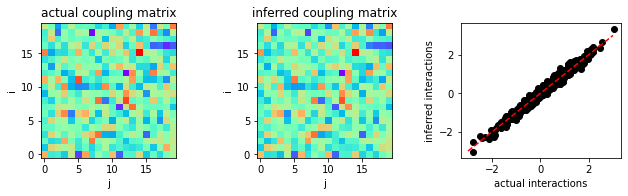

In [6]:
nx,ny = 3,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3,ny*2.8))

ax[0].imshow(w_true,cmap='rainbow',origin='lower')
ax[1].imshow(w,cmap='rainbow',origin='lower')
ax[2].plot(w_true,w,'ko')

ax[0].set_title('actual coupling matrix')
ax[1].set_title('inferred coupling matrix')
for i in range(2):
    ax[i].set_xlabel('j')
    ax[i].set_ylabel('i')
    
ax[2].plot([-3,3],[-3,3],'r--')
ax[2].set_xticks([-2,0,2])
ax[2].set_yticks([-2,0,2])
ax[2].set_xlabel('actual interactions')
ax[2].set_ylabel('inferred interactions')
    
plt.tight_layout(h_pad=1, w_pad=2.)

#plt.savefig('fig.pdf', format='pdf', dpi=100)

In [11]:
# test for one target
y_model = ER.model_expectation(X_test,h0[0],w[:,0])
y_pred = ER.predict(X_test,h0[0],w[:,0])

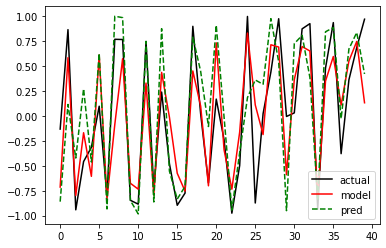

In [13]:
plt.plot(y_test[:40,0],'k-',label='actual')
plt.plot(y_model[:40],'r-',label='model')
plt.plot(y_pred[:40],'g--',label='pred')
plt.legend()